#### Work in model

In [37]:
from IPython.display import Image
Image(url="Image/2-Sonar.png")

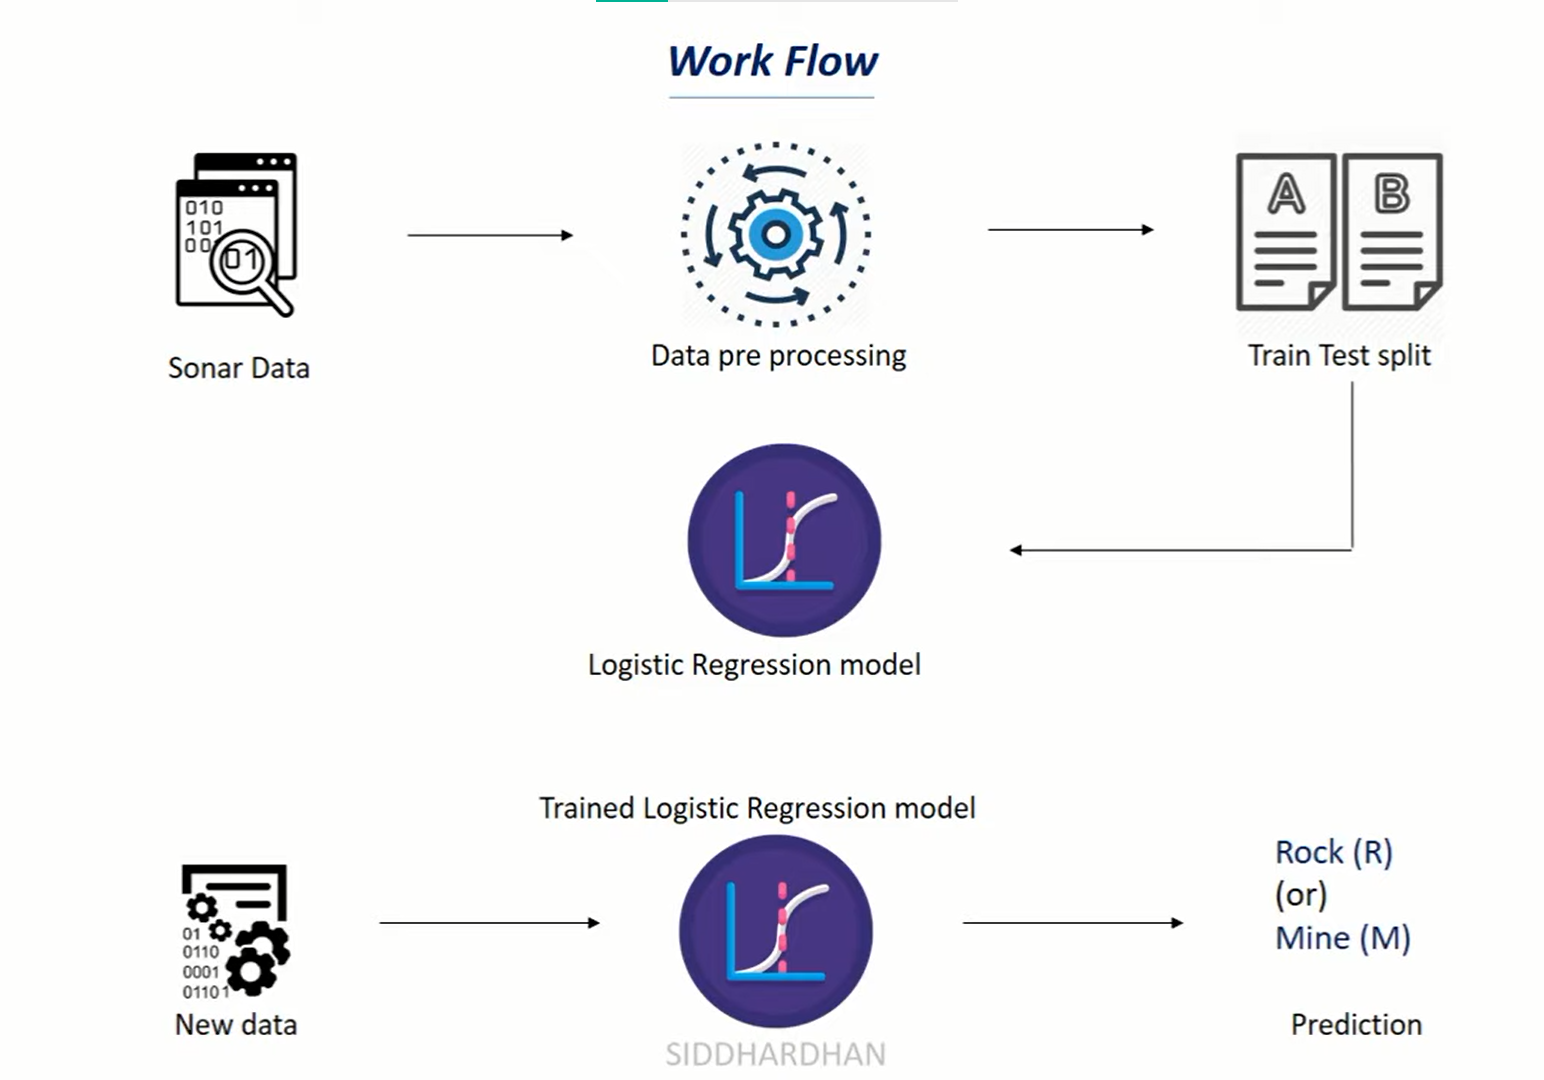

In [2]:
from PIL import Image
img=Image.open("Image/1-Sonar.png")
img

#### Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Data Collection and Data Processing

In [4]:
#loading the dataset to a pandas Dataframe
sonar_data=pd.read_csv("Data Set/sonar data.csv",header=None)

In [5]:
sonar_data

0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54      55      56      57  \
0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

         58      59  60  
0    0.0090  0.0032   R  
1    0.0052  0.0044   R  
2    0.0095  0.0078   R  
3    0.0040  0.0117   R  
4    0.0107  0.0094   R  
..      ...     ...  ..  
203  0.0193  0.0157   M  
204  0.0062  0.0067   M  
205  0.0077  0.0031   M  
206  0.0036  0.0048   M  
207  0.0061  0.0115   M  

[208 rows x 61 columns]

<AxesSubplot:>

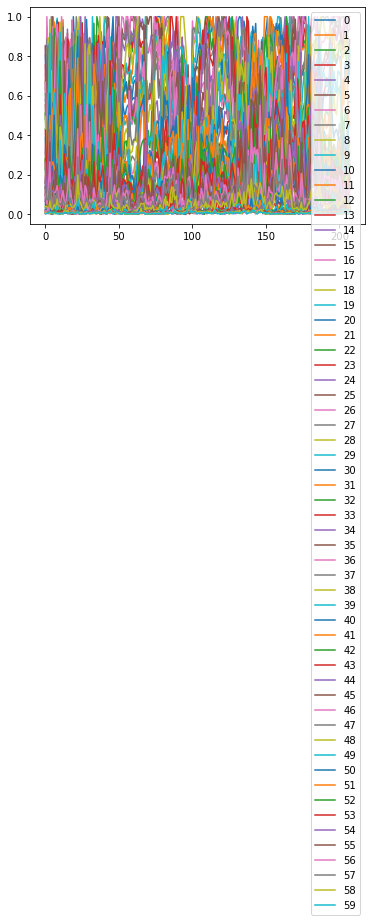

In [6]:
sonar_data.plot()

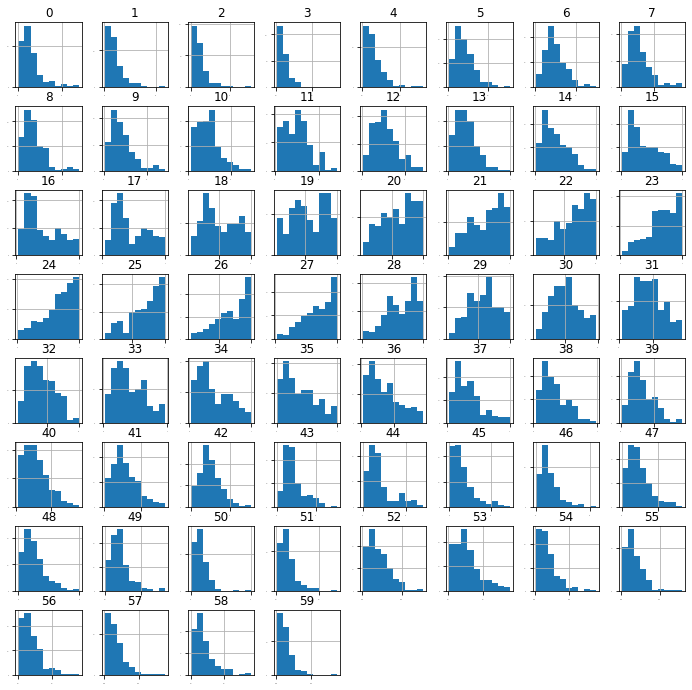

In [7]:
# histograms
sonar_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

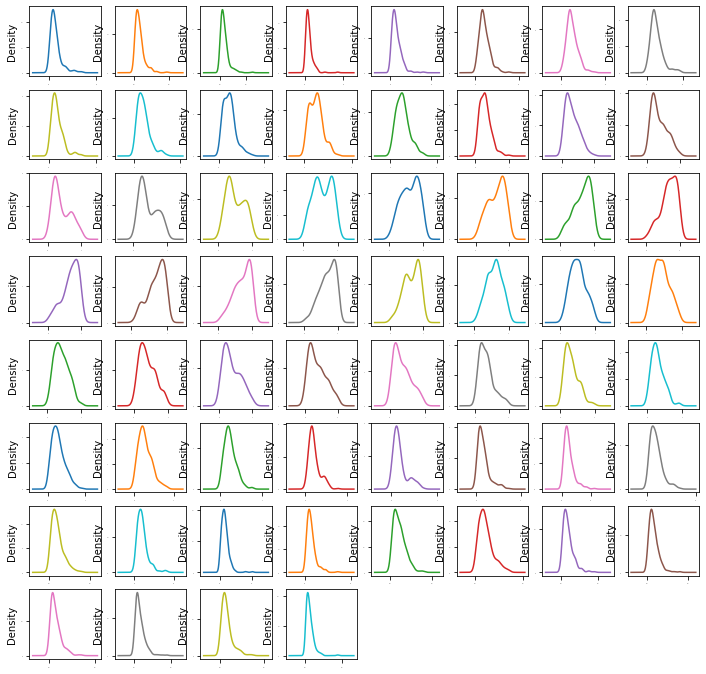

In [8]:
# density
sonar_data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
plt.show()

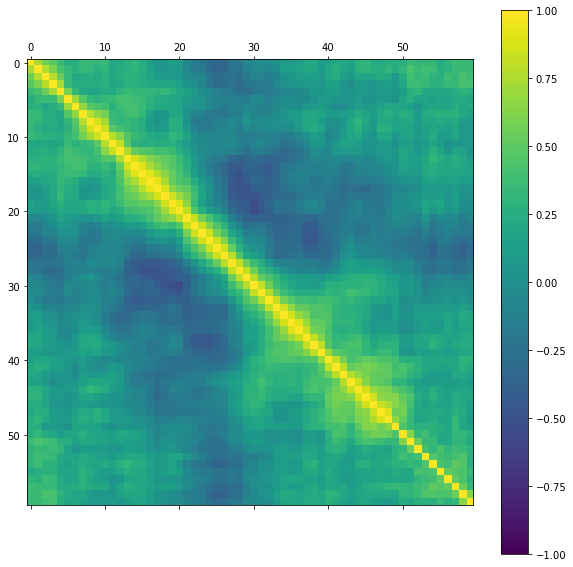

In [9]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(sonar_data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
plt.show()

In [10]:
# number of rows and columns
sonar_data.shape

(208, 61)

In [11]:
#describe --> statistical measures of the data
sonar_data.describe()

0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.134416  ...    0.012008   
min      0.003300    0.005500    0.007500    0.011300  ...    0.000000   
25%      0.080900    0.080425    0.097025    0.111275  ...    0.008425   
50%      0.106950    0.112100    0.152250    0.182400  ...    0.013900   
75%      0.154000    0.169600    0.233425    0.268700  ...    0.020825   
max      0.372900    0.459000    0.682800    0.710600  ...    0.100400   

               51          52          53          54          55          56  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.013420    0.010709    0.010941    0.009290    0.008222    0.007820   
std      0.009634    0.007060    0.007301    0.007088    0.005736    0.005785   
min      0.000800    0.000500    0.001000    0.000600    0.000400    0.000300   
25%      0.007275    0.005075    0.005375    0.004150    0.004400    0.003700   
50%      0.011400    0.009550    0.009300    0.007500    0.006850    0.005950   
75%      0.016725    0.014900    0.014500    0.012100    0.010575    0.010425   
max      0.070900    0.039000    0.035200    0.044700    0.039400    0.035500   

               57          58          59  
count  208.000000  208.000000  208.000000  
mean     0.007949    0.007941    0.006507  
std      0.006470    0.006181    0.005031  
min      0.000300    0.000100    0.000600  
25%      0.003600    0.003675    0.003100  
50%      0.005800    0.006400    0.005300  
75%      0.010350    0.010325    0.008525  
max      0.044000    0.036400    0.043900  

[8 rows x 60 columns]

In [12]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

### M --> Mine

### R --> Rock

In [13]:
sonar_data.groupby(60).mean()

0         1         2         3         4         5         6   \
60                                                                         
M   0.034989  0.045544  0.050720  0.064768  0.086715  0.111864  0.128359   
R   0.022498  0.030303  0.035951  0.041447  0.062028  0.096224  0.114180   

          7         8         9   ...        50        51        52        53  \
60                                ...                                           
M   0.149832  0.213492  0.251022  ...  0.019352  0.016014  0.011643  0.012185   
R   0.117596  0.137392  0.159325  ...  0.012311  0.010453  0.009640  0.009518   

          54        55        56        57        58        59  
60                                                              
M   0.009923  0.008914  0.007825  0.009060  0.008695  0.006930  
R   0.008567  0.007430  0.007814  0.006677  0.007078  0.006024  

[2 rows x 60 columns]

In [14]:
sonar_data.groupby(60).median()

0       1       2       3       4       5       6       7       8   \
60                                                                           
M   0.0269  0.0353  0.0386  0.0547  0.0748  0.1091  0.1232  0.1298  0.1864   
R   0.0201  0.0242  0.0288  0.0350  0.0476  0.0792  0.1015  0.0973  0.1054   

        9   ...      50      51      52      53      54      55      56  \
60          ...                                                           
M   0.2245  ...  0.0171  0.0132  0.0101  0.0096  0.0072  0.0074  0.0057   
R   0.1264  ...  0.0107  0.0088  0.0081  0.0088  0.0077  0.0065  0.0061   

        57      58      59  
60                          
M   0.0070  0.0070  0.0053  
R   0.0052  0.0058  0.0054  

[2 rows x 60 columns]

In [15]:
# separating data and Labels
X=sonar_data.drop(columns=60,axis=1)
Y=sonar_data[60]

In [16]:
X

0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53      54      55      56  \
0    0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180   
1    0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
2    0.6194  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
3    0.1264  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
4    0.4459  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0203  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065   
204  0.2154  ...  0.0051  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034   
205  0.2529  ...  0.0155  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140   
206  0.2354  ...  0.0042  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034   
207  0.2354  ...  0.0181  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040   

         57      58      59  
0    0.0084  0.0090  0.0032  
1    0.0049  0.0052  0.0044  
2    0.0164  0.0095  0.0078  
3    0.0044  0.0040  0.0117  
4    0.0048  0.0107  0.0094  
..      ...     ...     ...  
203  0.0115  0.0193  0.0157  
204  0.0032  0.0062  0.0067  
205  0.0138  0.0077  0.0031  
206  0.0079  0.0036  0.0048  
207  0.0036  0.0061  0.0115  

[208 rows x 60 columns]

In [17]:
Y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

#### Training and Test data

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [19]:
print("X Shape={}".format(X.shape))
print("X_train Shape={}".format(x_train.shape))
print("X_test Shape={}".format(x_test.shape))

X Shape=(208, 60)
X_train Shape=(187, 60)
X_test Shape=(21, 60)


In [20]:
print(x_train)
print("X_train Shape={}".format(x_train.shape))

print(y_train)
print("y_train Shape={}".format(y_train.shape))

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

#### Model Training --> Logistic Regression Algorithm

In [21]:
model=LogisticRegression()

In [22]:
#training the Logistic Regression model with training data
model.fit(x_train,y_train)

LogisticRegression()

#### Model Evaluation

In [23]:
#accuracy on training data
x_train_predict=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_predict,y_train)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8342245989304813


In [24]:
model.predict(x_train)

array(['M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'R',
       'R', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'R', 'R', 'M', 'M',
       'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'M',
       'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M',
       'M', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M',
       'M', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'R',
       'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'M',
       'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R',
       'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'R', 'R', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R',
       'M', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R',
       'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'R', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M

In [25]:
print('Accuracy on training data : ', model.score(x_train,y_train))

Accuracy on training data :  0.8342245989304813


In [26]:
#accuracy on test data
x_test_predict=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_predict,y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7619047619047619


In [27]:
model.predict(x_test)

array(['M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R'], dtype=object)

In [28]:
print('Accuracy on training data : ', model.score(x_test,y_test))

Accuracy on training data :  0.7619047619047619


#### Making a Predictive System

In [33]:
input_data = (0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,0.0801,0.1056,0.1266,0.0890,0.0198,0.1133,0.2826,0.3234,0.3238,0.4333,0.6068,0.7652,0.9203,0.9719,0.9207,0.7545,0.8289,0.8907,0.7309,0.6896,0.5829,0.4935,0.3101,0.0306,0.0244,0.1108,0.1594,0.1371,0.0696,0.0452,0.0620,0.1421,0.1597,0.1384,0.0372,0.0688,0.0867,0.0513,0.0092,0.0198,0.0118,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040)

# changing the input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
input_data_as_numpy_array

array([0.0164, 0.0173, 0.0347, 0.007 , 0.0187, 0.0671, 0.1056, 0.0697,
       0.0962, 0.0251, 0.0801, 0.1056, 0.1266, 0.089 , 0.0198, 0.1133,
       0.2826, 0.3234, 0.3238, 0.4333, 0.6068, 0.7652, 0.9203, 0.9719,
       0.9207, 0.7545, 0.8289, 0.8907, 0.7309, 0.6896, 0.5829, 0.4935,
       0.3101, 0.0306, 0.0244, 0.1108, 0.1594, 0.1371, 0.0696, 0.0452,
       0.062 , 0.1421, 0.1597, 0.1384, 0.0372, 0.0688, 0.0867, 0.0513,
       0.0092, 0.0198, 0.0118, 0.009 , 0.0223, 0.0179, 0.0084, 0.0068,
       0.0032, 0.0035, 0.0056, 0.004 ])

In [34]:
# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped

array([[0.0164, 0.0173, 0.0347, 0.007 , 0.0187, 0.0671, 0.1056, 0.0697,
        0.0962, 0.0251, 0.0801, 0.1056, 0.1266, 0.089 , 0.0198, 0.1133,
        0.2826, 0.3234, 0.3238, 0.4333, 0.6068, 0.7652, 0.9203, 0.9719,
        0.9207, 0.7545, 0.8289, 0.8907, 0.7309, 0.6896, 0.5829, 0.4935,
        0.3101, 0.0306, 0.0244, 0.1108, 0.1594, 0.1371, 0.0696, 0.0452,
        0.062 , 0.1421, 0.1597, 0.1384, 0.0372, 0.0688, 0.0867, 0.0513,
        0.0092, 0.0198, 0.0118, 0.009 , 0.0223, 0.0179, 0.0084, 0.0068,
        0.0032, 0.0035, 0.0056, 0.004 ]])

In [35]:
prediction=model.predict(input_data_reshaped)
prediction

array(['R'], dtype=object)

In [36]:
if(prediction == 'R'):
    print("The object is a Rock")
else:
    print("The object is a mine")

The object is a Rock
